#### 실습2. 로지스틱 회귀 구현

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

[100/99],  0.4616
[200/199],  0.3545
[300/299],  0.3052
[400/399],  0.2772
[500/499],  0.2592
[600/599],  0.2467
[700/699],  0.2376
[800/799],  0.2306
[900/899],  0.2251
[1000/999],  0.2207


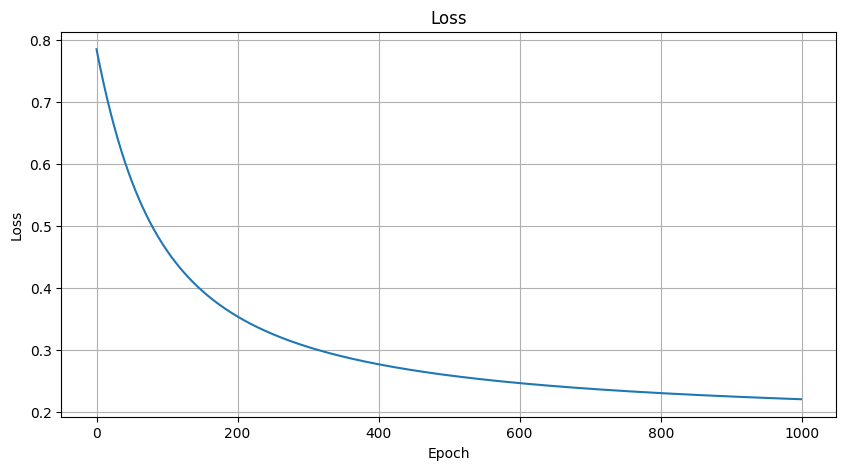

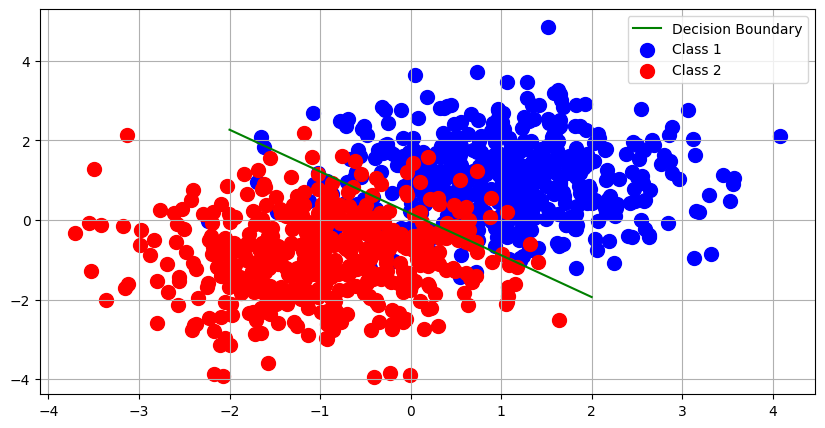

In [38]:
# 1. 입출력 정의
np.random.seed(42) # seed : 랜덤값이 한번 생성되면 고정해준다.
num_samples = 500

# 1-1.
mean_1 = np.array([1.0, 1.0])
cov_1 = np.array([[1,0],    
                  [0,1]]) # 분산 : 얼마나 퍼져있는가. # [[1,0], [0,1]]: x의 퍼짐 정도, y의 퍼짐 정도
data_1 = np.random.multivariate_normal(mean_1, cov_1, num_samples) # multivariate_normal: 평균과 분산에 따라서 적당하게 값을 갖도록 만들어 주는 함수

# 1-2.
mean_2 = np.array([-1.0, -1.0])
cov_2 = np.array([[1,0],    
                  [0,1]]) # 분산 : 얼마나 퍼져있는가. # [[1,0], [0,1]]: x의 퍼짐 정도, y의 퍼짐 정도
data_2 = np.random.multivariate_normal(mean_2, cov_2, num_samples) # multivariate_normal: 평균과 분산에 따라서 적당하게 값을 갖도록 만들어 주는 함수
data_2

data = np.vstack((data_1, data_2)) # 하나의 데이터로 사용하기 위해 데이터 합치기
data = torch.from_numpy(data).float()
labels = np.ones(num_samples * 2)
labels[num_samples: ] = 0
labels = torch.from_numpy(labels).float().view(-1,1) # 레이블을 데이터와 형식 맞춰주기

# 2. 모델 정의 
class LogisticRegression(nn.Module) :
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        out = torch.sigmoid(out) # 활성화 함수를 시그모이드로 쓴다.
        return out
    
model = LogisticRegression(2,1)

# 3. 손실함수
loss_fn = nn.BCELoss() # LogisticRegression의 손실함수는 BCELoss()

# 4. 가중치 학습
optimizer = optim.SGD(model.parameters(), lr=0.01)

epochs = 1000
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(data)
    loss = loss_fn(outputs, labels)
    loss.backward()
    optimizer.step()
    losses.append(loss.item()) 

    if (epoch +1) % 100 == 0 :
        print(f'[{epoch + 1}/{epoch}], {loss.item(): .4f}')

plt.figure(figsize=(10,5))
plt.plot(losses)
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
w = model.linear.weight.data.numpy()
b = model.linear.bias.data.numpy()

# 결정 경계 만들기
x1 = np.array([-2,2])
x2 = (-(w[0][0] * x1) - b[0]) / w[0][1]
# 0 = w1 * x1 + W2 * x2 +b
# x2 = (-(s1*x1) - b) / w2
plt.plot(x1,x2, color = 'g', label = 'Decision Boundary')
plt.scatter(data_1[:,0], data_1[:,1], color = 'b', label = 'Class 1', s = 100) # [[x,y]]
plt.scatter(data_2[:,0], data_2[:,1], color = 'r', label = 'Class 2', s = 100) 
plt.grid()
plt.legend()
plt.show()

In [ ]:
# 이론 배우기!
np.random.seed(42) # seed : 랜덤값이 한번 생성되면 고정해준다.
test = np.random.rand(5)